<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/Termobarometria_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A termobarometria é uma técnica utilizada para estimar a pressão e a temperatura em que uma rocha foi formada com base nas características químicas de seus minerais.

A técnica de quantificação da pressão e temperatura da cristalização mineral é essencial para a compreensão da arquitetura de sistemas vulcânicos, bem como para limitar a migração e armazenamento de magma através da litosfera (Giacomoni et al., 2016; Ridolfi et al., 2008; Shane & Smith, 2013; Shaw, 2018a; Smith, 2013, apud Jorgenson et al., 2021). Para esse fim, a química dos clinopiroxênios tem sido amplamente utilizada para calibrar termobarômetros (Masotta et al., 2013; Neave & Putirka, 2017; Putirka, 2008; Wang et al., 2021, apud Jorgenson et al., 2021).

No entanto, essas equações são geralmente associadas a grandes estimativas de erro padrão e são adequadas apenas para composições específicas de fusão (Neave & Putirka, 2017; Masotta et al., 2013, apud Jorgenson et al., 2021) Além disso, as calibrações clássicas do termobarômetro foram autovalidadas, resultando em um ajuste excessivo dos dados e uma subestimação do erro padrão (Nimis & Taylor, 2000; Putirka, 2008, apud Jorgenson et al., 2021). Nesse sentido, o uso do Machine Learning pode ajudar a melhorar a precisão e eficiência dos modelos preditivos em comparação com os métodos tradicionais de termobarometria.

Os dados utilizados foram cedidos pelos autores do artigo intitulado "A Machine Learning-Based Approach to Clinopyroxene Thermobarometry: Model Optimization and Distribution for Use in Earth Sciences". Esses dados passaram por um pré-processamento pelos autores, que incluiu a aplicação de um filtro de equilíbrio com base na troca Fe-Mg, seguindo os trabalhos de outros autores, como Klügel & Klein, 2006; Putirka, 2008, 2016; Ziberna et al., 2016. O filtro aceitou apenas dados dentro de 1 desvio padrão da média KdFe-Mg do conjunto de dados não filtrado. Além disso, os dados foram filtrados para remover experimentos com alta pressão (>30 kbar) ou baixo teor de líquido SiO2 (<35 wt. % SiO2), pois essas regiões são raras no conjunto de dados de calibração e podem prejudicar o desempenho dos modelos de Machine Learning.


**PASSO 1: CONECTAR O GOOGLE COLAB COM O GOOGLE DRIVE**

Esse código permite conectar o Colab com sua conta do Google Drive para acessar arquivos armazenados no Google Drive.

A primeira linha "from google.colab import drive" importa o módulo "drive" do pacote "google.colab".

A segunda linha "drive.mount('/content/drive')" monta o Google Drive na pasta "/content/drive" no ambiente do Colab.

Depois de executar essas duas linhas de código, você será solicitado a autorizar o acesso do Colab ao seu Google Drive. Depois de autorizar, você pode acessar seus arquivos do Google Drive usando o caminho "/content/drive/".

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PASSO 2: IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import shapiro

**PASSO 3: LEITURA DO ARQUIVO DE ENTRADA**

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/minicurso/input.csv', encoding='ISO-8859-1')

In [4]:
dados

,Unnamed: 0,ï..Index,SiO2.cpx,Al2O3.cpx,TiO2.cpx,CaO.cpx,Na2O.cpx,K2O.cpx,FeO.cpx,MgO.cpx,...,K.cpx,Fe.cpx,Mg.cpx,Mn.cpx,Cr.cpx,Ni.cpx,P.cpx,cat.sum,Rm,kd
0,1,1551,52.33,1.40,0.23,16.41,0.17,0.00,12.64,15.49,...,0.000,0.398,0.870,0.017,0.000,0.0,0.0,3.999,N,0.210898
1,2,1617,52.05,1.66,0.24,16.38,0.21,0.00,13.79,14.65,...,0.000,0.435,0.824,0.016,0.000,0.0,0.0,3.998,N,0.227517
2,3,2272,48.94,3.77,0.50,12.17,0.53,0.00,21.68,10.40,...,0.000,0.712,0.609,0.008,0.000,0.0,0.0,3.994,N,0.250448
3,4,538,51.16,7.15,0.37,19.03,0.74,0.00,3.42,16.94,...,0.000,0.103,0.911,0.002,0.038,0.0,0.0,4.000,N,0.265738
4,5,149,50.20,9.80,0.35,16.00,0.45,0.00,4.70,18.80,...,0.000,0.140,1.001,0.004,0.004,0.0,0.0,4.005,N,0.322401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2075,827,37.83,15.13,3.56,23.46,0.39,0.24,9.58,7.79,...,0.012,0.314,0.455,0.000,0.000,0.0,0.0,4.083,N,0.374349
2075,2076,1156,52.10,1.47,0.81,13.40,0.12,0.00,13.90,17.80,...,0.000,0.434,0.991,0.000,0.000,0.0,0.0,4.004,N,0.245481
2076,2077,1393,48.70,0.85,0.80,5.33,0.00,0.00,33.60,11.00,...,0.000,1.118,0.652,0.000,0.013,0.0,0.0,4.012,N,0.250635
2077,2078,336,48.65,5.62,1.92,21.16,0.31,0.02,8.74,13.61,...,0.001,0.273,0.758,0.000,0.000,0.0,0.0,4.017,N,0.239807


**PASSO 4: LIMPEZA DOS DADOS**

Esses dados foram pré-filtrados pelos autores, aceitando apenas valores de troca Fe-Mg dentro de 1 desvio-padrão da média de KdFe-Mg e removendo experimentos de alta pressão (>30 kbar) ou com baixo teor de SiO2 (<35% em peso). As colunas "Rm" e "Kd" foram fornecidas, mas não serão usadas no modelo. As colunas "Ref" e "Run" também serão excluídas, pois se referem a informações de referência dos dados. Além disso, a coluna "Index" será excluída, pois se refere ao índice da análise antes do embaralhamento.

In [5]:
#verificando quais sao as colunas do dataframe
dados.columns

Index(['Unnamed: 0', 'ï..Index', 'SiO2.cpx', 'Al2O3.cpx', 'TiO2.cpx',
       'CaO.cpx', 'Na2O.cpx', 'K2O.cpx', 'FeO.cpx', 'MgO.cpx', 'MnO.cpx',
       'Cr2O3.cpx', 'NiO.cpx', 'P2O5.cpx', 'SiO2.liq', 'Al2O3.liq', 'TiO2.liq',
       'CaO.liq', 'Na2O.liq', 'K2O.liq', 'FeO.liq', 'MgO.liq', 'MnO.liq',
       'Cr2O3.liq', 'NiO.liq', 'P2O5.liq', 'T', 'P', 'Run', 'Ref', 'Si.cpx',
       'Al.cpx', 'Ti.cpx', 'Ca.cpx', 'Na.cpx', 'K.cpx', 'Fe.cpx', 'Mg.cpx',
       'Mn.cpx', 'Cr.cpx', 'Ni.cpx', 'P.cpx', 'cat.sum', 'Rm', 'kd'],
      dtype='object')

In [6]:
#removendo as colunas que não serão utilizadas
dados = dados.drop(['Unnamed: 0', 'ï..Index', 'Run', 'Ref', 'Rm', 'kd'], axis = 1)

In [7]:
#verificando, novamente, quais sao as colunas do dataframe
dados.columns

Index(['SiO2.cpx', 'Al2O3.cpx', 'TiO2.cpx', 'CaO.cpx', 'Na2O.cpx', 'K2O.cpx',
       'FeO.cpx', 'MgO.cpx', 'MnO.cpx', 'Cr2O3.cpx', 'NiO.cpx', 'P2O5.cpx',
       'SiO2.liq', 'Al2O3.liq', 'TiO2.liq', 'CaO.liq', 'Na2O.liq', 'K2O.liq',
       'FeO.liq', 'MgO.liq', 'MnO.liq', 'Cr2O3.liq', 'NiO.liq', 'P2O5.liq',
       'T', 'P', 'Si.cpx', 'Al.cpx', 'Ti.cpx', 'Ca.cpx', 'Na.cpx', 'K.cpx',
       'Fe.cpx', 'Mg.cpx', 'Mn.cpx', 'Cr.cpx', 'Ni.cpx', 'P.cpx', 'cat.sum'],
      dtype='object')

In [8]:
#verificando se há valores nulos
dados.isnull().sum()

SiO2.cpx     0
Al2O3.cpx    0
TiO2.cpx     0
CaO.cpx      0
Na2O.cpx     0
K2O.cpx      0
FeO.cpx      0
MgO.cpx      0
MnO.cpx      0
Cr2O3.cpx    0
NiO.cpx      0
P2O5.cpx     0
SiO2.liq     0
Al2O3.liq    0
TiO2.liq     0
CaO.liq      0
Na2O.liq     0
K2O.liq      0
FeO.liq      0
MgO.liq      0
MnO.liq      0
Cr2O3.liq    0
NiO.liq      0
P2O5.liq     0
T            0
P            0
Si.cpx       0
Al.cpx       0
Ti.cpx       0
Ca.cpx       0
Na.cpx       0
K.cpx        0
Fe.cpx       0
Mg.cpx       0
Mn.cpx       0
Cr.cpx       0
Ni.cpx       0
P.cpx        0
cat.sum      0
dtype: int64

**PASSO 5: ANÁLISE EXPLORATÓRIA DOS DADOS**

**1 - Função info()**

A função info() em pandas fornece um resumo conciso das informações sobre o DataFrame, incluindo o número de entradas não nulas, o tipo de dado de cada coluna e a quantidade de memória usada. Ela é especialmente útil para ter uma visão geral da estrutura do DataFrame.

A saída da função info() inclui as seguintes informações:

- RangeIndex: O intervalo de índices das linhas do DataFrame.
- Data columns: A lista das colunas do DataFrame, incluindo o nome e o total de colunas.
- Dtype: O tipo de dado de cada coluna.
- Non-Null Count: O número de valores não nulos em cada coluna.
- memory usage: A quantidade de memória utilizada pelo DataFrame.

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SiO2.cpx   2079 non-null   float64
 1   Al2O3.cpx  2079 non-null   float64
 2   TiO2.cpx   2079 non-null   float64
 3   CaO.cpx    2079 non-null   float64
 4   Na2O.cpx   2079 non-null   float64
 5   K2O.cpx    2079 non-null   float64
 6   FeO.cpx    2079 non-null   float64
 7   MgO.cpx    2079 non-null   float64
 8   MnO.cpx    2079 non-null   float64
 9   Cr2O3.cpx  2079 non-null   float64
 10  NiO.cpx    2079 non-null   float64
 11  P2O5.cpx   2079 non-null   float64
 12  SiO2.liq   2079 non-null   float64
 13  Al2O3.liq  2079 non-null   float64
 14  TiO2.liq   2079 non-null   float64
 15  CaO.liq    2079 non-null   float64
 16  Na2O.liq   2079 non-null   float64
 17  K2O.liq    2079 non-null   float64
 18  FeO.liq    2079 non-null   float64
 19  MgO.liq    2079 non-null   float64
 20  MnO.liq 

**2 - Estatística Descritiva**

A estatística descritiva é uma etapa inicial importante para explorar e entender os dados, fornecendo uma visão geral das características e propriedades fundamentais.

A função describe() é uma função estatística útil em Python que fornece um resumo estatístico das colunas numéricas de um DataFrame. Ela calcula várias estatísticas descritivas para cada coluna, oferecendo uma visão geral rápida dos dados. A função describe() retorna as seguintes estatísticas:

- Contagem (count): O número de valores não nulos em cada coluna.

- Média (mean): A média aritmética dos valores na coluna.

- Desvio padrão (std): A medida de dispersão dos valores em relação à média.

- Valor mínimo (min): O menor valor presente na coluna.

- Quartis (25%, 50%, 75%): Valores que dividem os dados em quartis, fornecendo informações sobre a distribuição dos dados. O 25% representa o primeiro quartil (Q1), o 50% é a mediana (Q2) e o 75% é o terceiro quartil (Q3).

- Valor máximo (max): O maior valor presente na coluna.

In [10]:
dados.describe()

,SiO2.cpx,Al2O3.cpx,TiO2.cpx,CaO.cpx,Na2O.cpx,K2O.cpx,FeO.cpx,MgO.cpx,MnO.cpx,Cr2O3.cpx,...,Ca.cpx,Na.cpx,K.cpx,Fe.cpx,Mg.cpx,Mn.cpx,Cr.cpx,Ni.cpx,P.cpx,cat.sum
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,...,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,50.857629,5.022458,0.729548,16.894334,0.536162,0.021347,9.162142,16.089630,0.228490,0.221178,...,0.669856,0.038277,0.000966,0.285787,0.882860,0.007239,0.006346,0.000057,0.000213,4.008262
std,2.232614,3.221238,0.662754,4.931990,0.672233,0.076960,4.788408,3.952534,0.205509,0.371303,...,0.198416,0.047853,0.003695,0.156628,0.203156,0.006749,0.010582,0.000385,0.001393,0.022057
min,37.830000,0.000000,0.000000,0.370000,0.000000,0.000000,1.700000,0.770000,0.000000,0.000000,...,0.015000,0.000000,0.000000,0.051000,0.047000,0.000000,0.000000,0.000000,0.000000,3.869000
25%,49.895000,2.450000,0.290000,15.100000,0.210000,0.000000,5.890000,14.200000,0.110000,0.000000,...,0.595000,0.015000,0.000000,0.179000,0.790000,0.003000,0.000000,0.000000,0.000000,3.997000
50%,51.200000,4.400000,0.570000,18.000000,0.350000,0.000000,7.951833,15.760000,0.180000,0.000000,...,0.713000,0.025000,0.000000,0.244000,0.873000,0.006000,0.000000,0.000000,0.000000,4.006000
75%,52.100000,7.055000,0.900000,20.240000,0.590000,0.010000,11.700000,17.890000,0.300000,0.320000,...,0.802000,0.042000,0.000000,0.367500,0.969000,0.009000,0.009000,0.000000,0.000000,4.018000
max,57.200000,25.760000,5.690000,24.820000,7.760000,1.050000,34.200000,32.100000,2.200000,2.110000,...,0.994000,0.529000,0.050000,1.157000,1.669000,0.075000,0.060000,0.009000,0.032000,4.158000


A partir dos dados apresentados, podemos obter algumas informações importantes e insights.

A seguir estão alguns insights que podem ser extraídos:

-  maior concentração média em clinopiroxênios é de SiO2.cpx (50,86%) e a menor é de NiO.cpx (0,002%). Em líquidos, a maior concentração média é de SiO2.liq (53,28%) e a menor é de NiO.liq (0,001%).

- O desvio padrão indica a variabilidade dos dados. Os elementos com maior variabilidade em clinopiroxênios são Al2O3.cpx (3,22) e MgO.cpx (3,95), enquanto em líquidos são Al2O3.liq (3,32) e MgO.liq (3,46).

- A faixa de temperatura (T) varia de 650 a 1700 (média de 1149,71 e desvio padrão de 134,93), enquanto a faixa de pressão (P) varia de 0 a 30 (média de 6,74 e desvio padrão de 7,53).

- A soma dos cátions (cat.sum) tem uma média de 4,01, com um desvio padrão de 0,02, indicando que a maioria das amostras está próxima da média.

**3 - ANÁLISE DE CORRELAÇÃO**

Na análise de correlação, uma abordagem comum é iniciar com a criação de um gráfico de dispersão (scatterplot) e, em seguida, realizar uma análise estatística da correlação. Ao analisar o scatterplot abaixo, podemos observar uma correlação moderadamente positiva entre as duas variáveis.

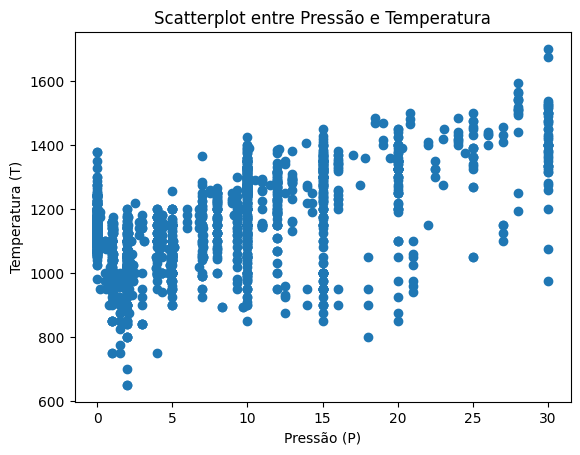

In [11]:
# Cria um gráfico de dispersão (scatterplot) utilizando os valores das colunas
#'P' (Pressão) e 'T' (Temperatura) do DataFrame 'dados'
plt.scatter(dados['P'], dados['T'])

# Define o rótulo do eixo x como 'Pressão (P)'
plt.xlabel('Pressão (P)')

# Define o rótulo do eixo y como 'Temperatura (T)'
plt.ylabel('Temperatura (T)')

# Adiciona um título ao gráfico: 'Scatterplot entre Pressão e Temperatura'
plt.title('Scatterplot entre Pressão e Temperatura')

# Exibe o gráfico na tela
plt.show()


In [12]:
correlacao = dados['P'].corr(dados['T'])
print("Correlação entre Pressão (P) e Temperatura (T):", correlacao)

Correlação entre Pressão (P) e Temperatura (T): 0.5636827382231157


A correlação entre Pressão (P) e Temperatura (T) de 0.5637 indica uma correlação positiva realmente moderada entre essas duas variáveis. Isso significa que, em geral, conforme a pressão aumenta, a temperatura também tende a aumentar, e vice-versa.

No entanto, é importante notar que a correlação entre pressão e temperatura não é perfeita. Isso ocorre porque existem variações geológicas e tudo depende do contexto!

**4 - ANÁLISE DE OUTLIERS**

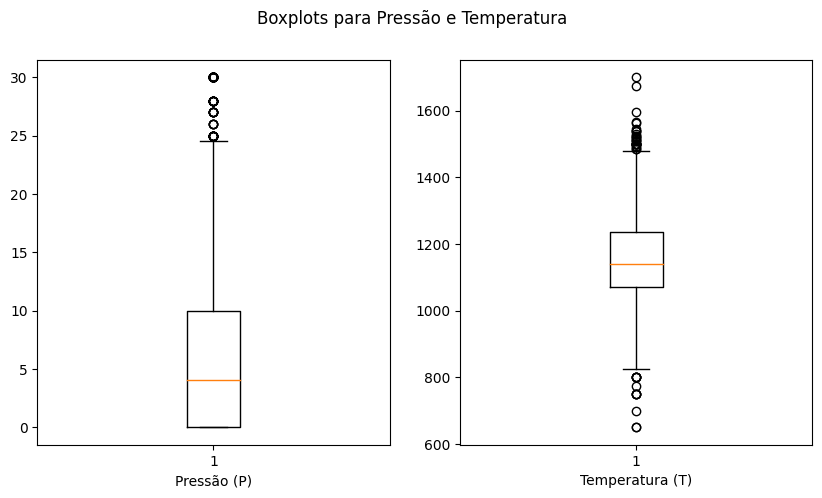

In [13]:
# Cria uma figura e dois eixos (um para cada boxplot)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Cria o boxplot para a coluna 'P' (Pressão) e define o rótulo do eixo x
axes[0].boxplot(dados['P'])
axes[0].set_xlabel('Pressão (P)')

# Cria o boxplot para a coluna 'T' (Temperatura) e define o rótulo do eixo x
axes[1].boxplot(dados['T'])
axes[1].set_xlabel('Temperatura (T)')

# Define um título geral para a figura
fig.suptitle('Boxplots para Pressão e Temperatura')

# Exibe os boxplots na tela
plt.show()

Ao observar os boxplots, podemos identificar a presença de alguns outliers. No entanto, não vou removê-los da análise, pois esses pontos são importantes a depender do contexto geológico.

**5 - ANÁLISE DE DISTRIBUIÇÃO**

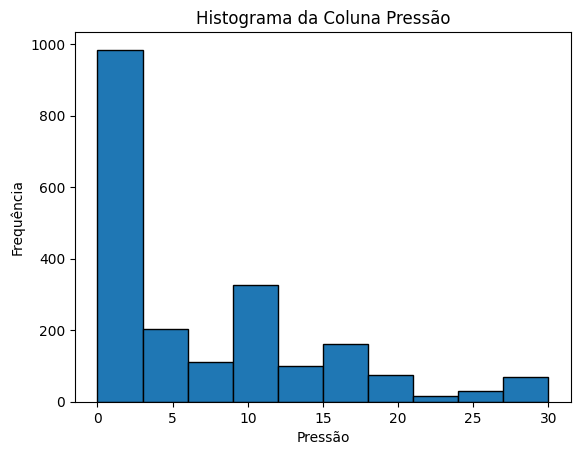

In [14]:
plt.hist(dados['P'], bins=10, edgecolor='black')
plt.xlabel('Pressão')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna Pressão')
plt.show()

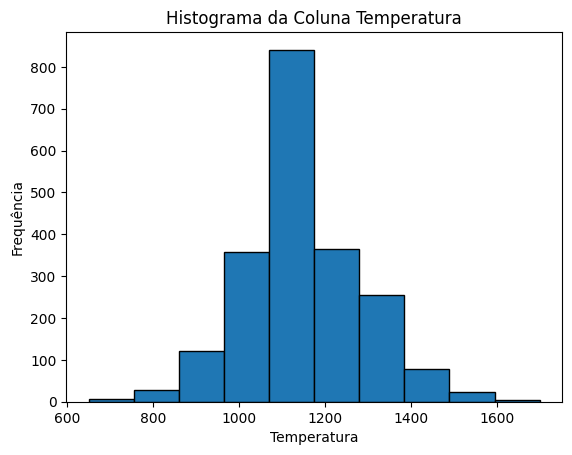

In [15]:
plt.hist(dados['T'], bins=10, edgecolor='black')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna Temperatura')
plt.show()

Os dados parecem ter uma distribuição normal. Para confirmar, realizarei o tesde de Shapiro-Wilk.

In [17]:
temperatura = dados['T']

# Realizando o teste de Shapiro-Wilk
stat, p_valor = shapiro(temperatura)

print("Estatística:", stat)
print("P-valor:", p_valor)

# Interpretação do P-valor
alfa = 0.05
if p_valor > alfa:
    print("A distribuição parece normal (não rejeita H0)")
else:
    print("A distribuição não parece normal (rejeita H0)")

Estatística: 0.9861677885055542
P-valor: 2.6731169903461416e-13
A distribuição não parece normal (rejeita H0)


#**PASSO 6 - MACHINE LEARNING**

##**MODELO ESCOLHIDO: RANDOM FOREST**

O QUE É RANDOM FOREST?

Random Forest é um algoritmo de aprendizado de máquina utilizado para problemas de classificação, regressão e outras tarefas de modelagem preditiva. O algoritmo funciona criando uma floresta de árvores de decisão aleatórias, onde cada árvore é construída de forma independente usando uma amostra aleatória do conjunto de dados de treinamento e com variáveis de entrada escolhidas aleatoriamente.

Cada árvore na floresta faz uma previsão individual e, em seguida, a previsão final é determinada pela média das previsões de todas as árvores na floresta. O algoritmo Random Forest é usado principalmente porque é robusto, preciso e pode lidar com conjuntos de dados grandes e complexos.

Além disso, o Random Forest também é capaz de lidar com problemas de sobreajuste (overfitting) e pode ser usado para selecionar recursos importantes para o modelo, o que o torna uma opção popular em muitos casos.




In [23]:
X_random = dados.drop(['P', 'T'], axis=1) # remove as colunas de P e T do conjunto de dados
y_random = dados[['P', 'T']]

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

In [24]:
# criar um objeto de regressor de Random Forest com 100 árvores
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# ajustar o modelo com o conjunto de treinamento
rf_model.fit(X_train_random, y_train_random['T'])

# fazer previsões no conjunto de teste
y_pred_temperatura_random = rf_model.predict(X_test_random)

In [25]:
# calcular MAE  e R²
mae_temperatura_random = mean_absolute_error(y_test_random['T'], y_pred_temperatura_random)
r2_temperatura_random = r2_score(y_test_random['T'], y_pred_temperatura_random)

# imprimir as métricas
print("MAE:", mae_temperatura_random)
print("R²:", r2_temperatura_random)

MAE: 23.127175480769225
R²: 0.9353990827224284


In [26]:
# ajustar o modelo com o conjunto de treinamento
rf_model.fit(X_train_random, y_train_random['P'])

# fazer previsões no conjunto de teste
y_pred_pressao_random = rf_model.predict(X_test_random)

In [27]:
# calcular MAE e R²
mae_pressao_random = mean_absolute_error(y_test_random['P'], y_pred_pressao_random)
r2_pressao_random = r2_score(y_test_random['P'], y_pred_pressao_random)

# imprimir as métricas
print("MAE:", mae_pressao_random)
print("R²:", r2_pressao_random)

MAE: 1.462118790665064
R²: 0.8991971333357367


A utilização de Machine Learning na termobarometria com clinopiroxênio
obteve resultados significativos para a determinação das condições de temperatura
(T) e pressão (P) nas quais as rochas se formaram. A aplicação do algoritmo Random
Forest demonstrou alta precisão e eficiência nos resultados obtidos, ressaltando a
utilidade e relevância de métodos computacionais na área das geociências.
Os resultados obtidos fornecem uma clara evidência de que essa abordagem
pode contribuir de forma significativa para uma melhor compreensão dos processos
geológicos envolvidos na formação de rochas, bem como aprimorar a confiabilidade
das estimativas termobarométricas.